In [96]:
import numpy as np
from PIL import Image
from scipy import ndimage
#from skimage.feature import register_translation
from skimage.registration import phase_cross_correlation
from scipy.ndimage import filters
from tqdm.notebook import tqdm
import time
import os
from skimage.filters import laplace, sobel
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pathlib import Path

In [74]:
path = Path('c:\\Users\\fe0968\\Documents\\data\\xenopus\\frames\\')

upsampling = 20
sigma = 0



In [105]:
i = 63 - 1

im1 = np.array(Image.open(path / f'frame1_{str(i).zfill(4)}.tif'))
im2 = np.array(Image.open(path / f'frame2_{str(i).zfill(4)}.tif'))

x1 = 0
x2 = 900
y1 = 0
y2 = 120

im1 = im1[y1:y2, x1:x2]
im2 = im2[y1:y2, x1:x2]

<Figure size 960x480 with 0 Axes>

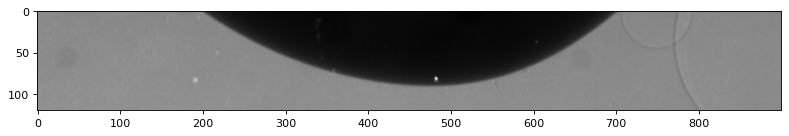

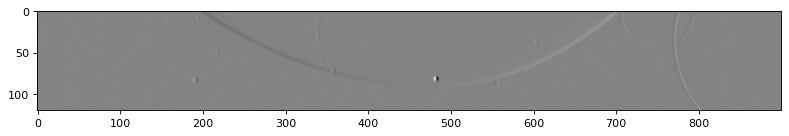

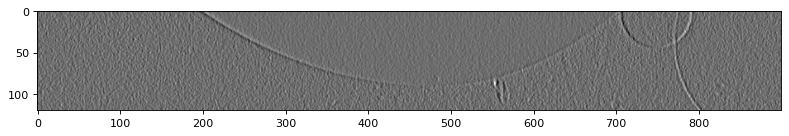

In [106]:
figure(figsize=(12, 6), dpi=80)
#plt.imshow(im2, cmap='gray')
#plt.show()

imp1 = filters.gaussian_filter(im1, sigma)
imp2 = filters.gaussian_filter(im2, sigma)

figure(figsize=(12, 6), dpi=80)
plt.imshow(imp1, cmap='gray')
plt.show()

#figure(figsize=(12, 6), dpi=80)
#plt.imshow(imp2, cmap='gray')
#plt.show()

imf1 = filters.sobel(imp1)
imf2 = filters.sobel(imp2)

figure(figsize=(12, 6), dpi=80)
plt.imshow(imf1, cmap='gray')
plt.show()

#figure(figsize=(12, 6), dpi=80)
#plt.imshow(imf2, cmap='gray')
#plt.show()


figure(figsize=(12, 6), dpi=80)
plt.imshow(imf2 - imf1, cmap='gray')
plt.show()

In [86]:
shift, error, diffphase = phase_cross_correlation(imf1, imf2, upsample_factor=100)
print(shift[0], ' ', shift[1])

-0.21   0.12


In [97]:
std = []
means = []
dx = []
dy = []


for i in tqdm(range(176)):
    im1 = np.array(Image.open(path / f'frame1_{str(i).zfill(4)}.tif'))
    im2 = np.array(Image.open(path / f'frame2_{str(i).zfill(4)}.tif'))

    x1 = 0
    x2 = 900
    y1 = 0
    y2 = 120

    im1 = im1[y1:y2, x1:x2]
    im2 = im2[y1:y2, x1:x2]

    imp1 = filters.gaussian_filter(im1, sigma)
    imp2 = filters.gaussian_filter(im2, sigma)

    imf1 = filters.sobel(imp1)
    imf2 = filters.sobel(imp2)

    shift, error, diffphase = phase_cross_correlation(imf1, imf2, upsample_factor=100)

    dx.append(shift[1])
    dy.append(shift[0])

    diff = imf2 - imf1
    std.append(np.std(diff))
    means.append(np.mean(diff))

    #print(shift[0], ' ', shift[1])

  0%|          | 0/176 [00:00<?, ?it/s]

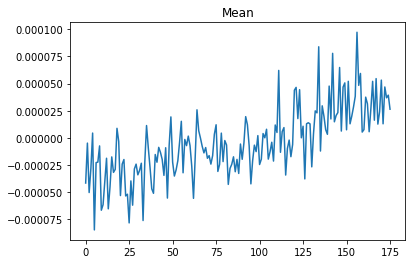

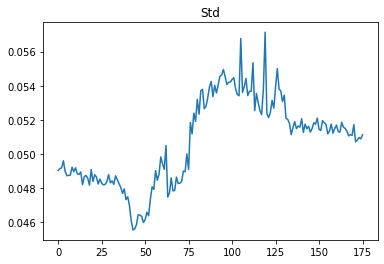

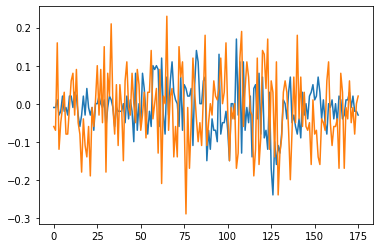

In [101]:

plt.plot(means)
plt.title('Mean')
plt.show()

plt.plot(std)
plt.title('Std')
plt.show()

plt.plot(dx)
plt.plot(dy)
plt.show()
